# **Importing Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Load Data**

In [5]:
df = pd.read_csv("OnlineOrders_of_a_ecommerce_website.csv")


# **Basic Info**

In [8]:
print(" Shape of Data:", df.shape)
print(" Data Types:\n", df.dtypes)
print(" Missing Values:\n", df.isnull().sum())
print(" Duplicate Rows:", df.duplicated().sum())



 Shape of Data: (8083, 6)
 Data Types:
 crawl_timestamp           object
product_name              object
product_category_tree     object
retail_price             float64
discounted_price         float64
brand                     object
dtype: object
 Missing Values:
 crawl_timestamp          0
product_name             0
product_category_tree    0
retail_price             0
discounted_price         0
brand                    0
dtype: int64
 Duplicate Rows: 1331


# **Drop duplicates if any**

In [11]:
df = df.drop_duplicates()



# **Convert Timestamp**

In [14]:
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])


# ** Category Extraction (simplify nested category)**

In [17]:
df['main_category'] = df['product_category_tree'].str.extract(r'\["([^">]+)')
df['main_category'] = df['main_category'].str.split(">>").str[0].str.strip()



# **Basic Stats**

In [20]:
print("\n🔹 Price Statistics:\n", df[['retail_price', 'discounted_price']].describe())



🔹 Price Statistics:
         retail_price  discounted_price
count    6752.000000       6752.000000
mean     5135.838270       3629.601451
std     10980.800413       8398.515545
min        35.000000         35.000000
25%       699.000000        349.000000
50%      1164.500000        599.000000
75%      2488.500000       1399.000000
max    116292.000000     116292.000000


# **Visualizations**

## **Category distribution**


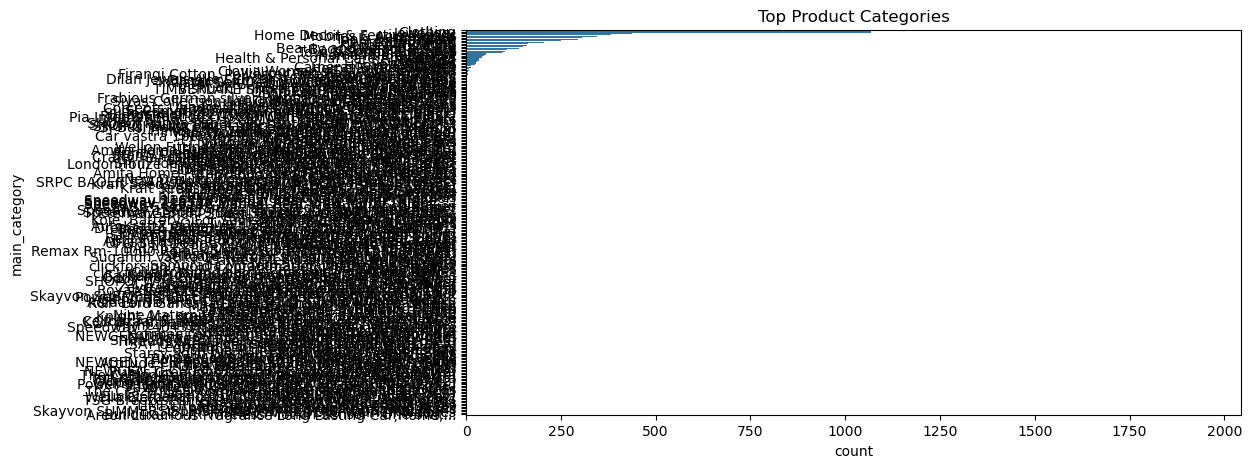

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y='main_category', data=df, order=df['main_category'].value_counts().index)
plt.title("Top Product Categories")
plt.show()


## **Price distribution**

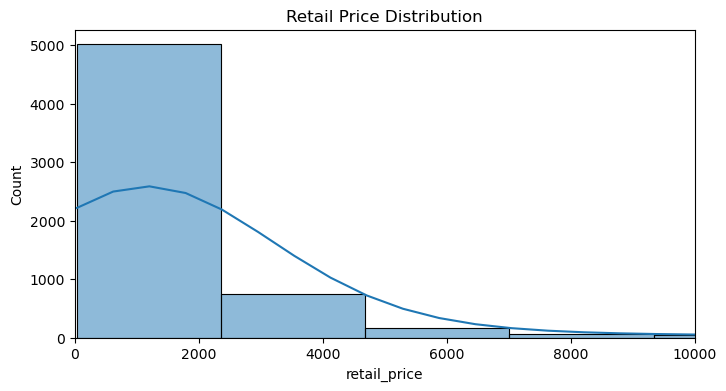

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(df['retail_price'], bins=50, kde=True)
plt.title("Retail Price Distribution")
plt.xlim(0, 10000)
plt.show()



## **Discount analysis**

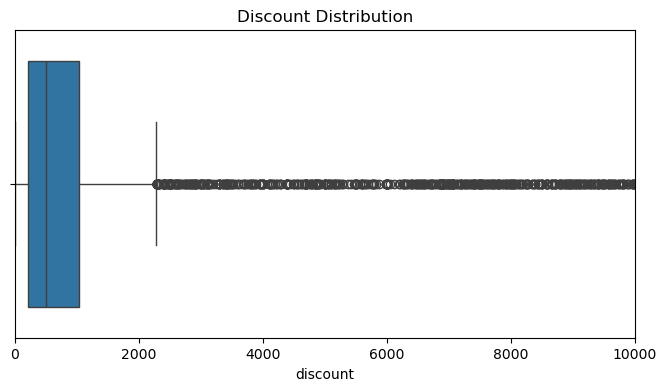

In [30]:
df['discount'] = df['retail_price'] - df['discounted_price']
plt.figure(figsize=(8,4))
sns.boxplot(x=df['discount'])
plt.title("Discount Distribution")
plt.xlim(0, 10000)
plt.show()


## **Brand analysis - top 10**

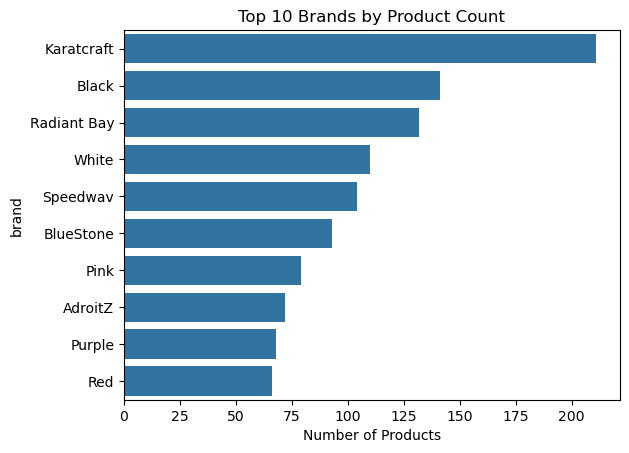

In [33]:
top_brands = df['brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.show()



## **Time trend (monthly listing trend)**

C:\Users\Litheeswari B\AppData\Local\Temp\ipykernel_28312\1863254799.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['crawl_timestamp'].dt.to_period('M')


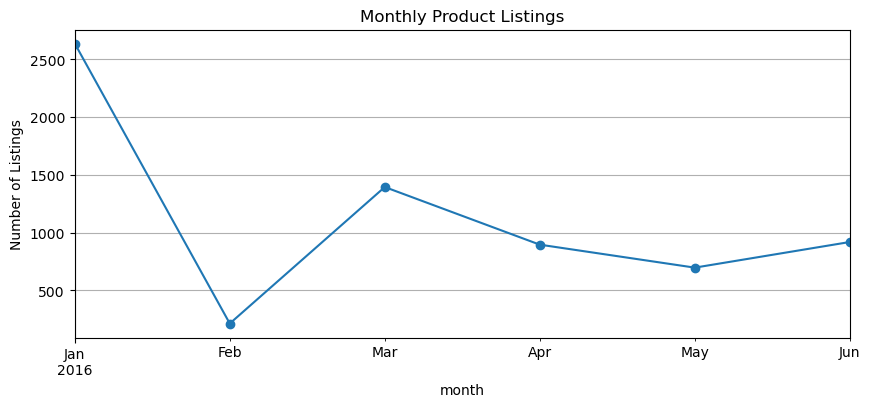

In [36]:
df['month'] = df['crawl_timestamp'].dt.to_period('M')
monthly_counts = df.groupby('month').size()
monthly_counts.plot(kind='line', marker='o', figsize=(10,4), title="Monthly Product Listings")
plt.ylabel("Number of Listings")
plt.grid()
plt.show()


## **Correlation between price and discount**

In [39]:
print("\n  Correlation between Retail and Discounted Price:")
print(df[['retail_price', 'discounted_price', 'discount']].corr())


  Correlation between Retail and Discounted Price:
                  retail_price  discounted_price  discount
retail_price          1.000000          0.990205  0.915285
discounted_price      0.990205          1.000000  0.850078
discount              0.915285          0.850078  1.000000
